# 05 Damage Prediction

单样本损伤预测演示，展示预测 vs 真实对比和损伤热力图。

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.data_loader import load_predictions, load_dataset
from utils.visualizer import plot_damage_comparison, plot_stress_distribution
from utils.config import LATEST_PREDICTIONS, DATASET_PATH

## 加载预测结果

In [2]:
# 加载预测结果
y_true, y_pred = load_predictions(LATEST_PREDICTIONS)

print("=" * 50)
print("预测结果信息")
print("=" * 50)
print(f"真实值形状: {y_true.shape}")
print(f"预测值形状: {y_pred.shape}")

预测结果信息
真实值形状: (3000, 11)
预测值形状: (3000, 11)


## 随机选择样本展示

In [3]:
# 随机选择测试样本
np.random.seed(42)
sample_idx = np.random.randint(0, y_true.shape[0])

print(f"选择样本索引: {sample_idx}")

# 计算该样本的误差
error = np.abs(y_true[sample_idx] - y_pred[sample_idx])
mae = np.mean(error)
print(f"样本 MAE: {mae:.4f}")

选择样本索引: 860
样本 MAE: 0.0800


## 损伤预测对比图

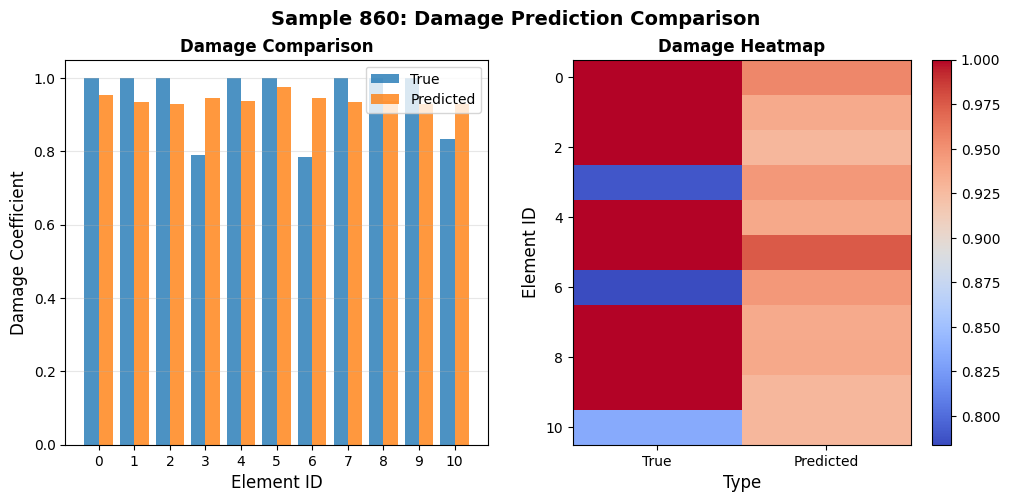

In [4]:
# 绘制损伤预测对比
plot_damage_comparison(
    y_true[sample_idx], 
    y_pred[sample_idx],
    element_ids=range(len(y_true[sample_idx])),
    title=f'Sample {sample_idx}: Damage Prediction Comparison'
)

## 多样本展示

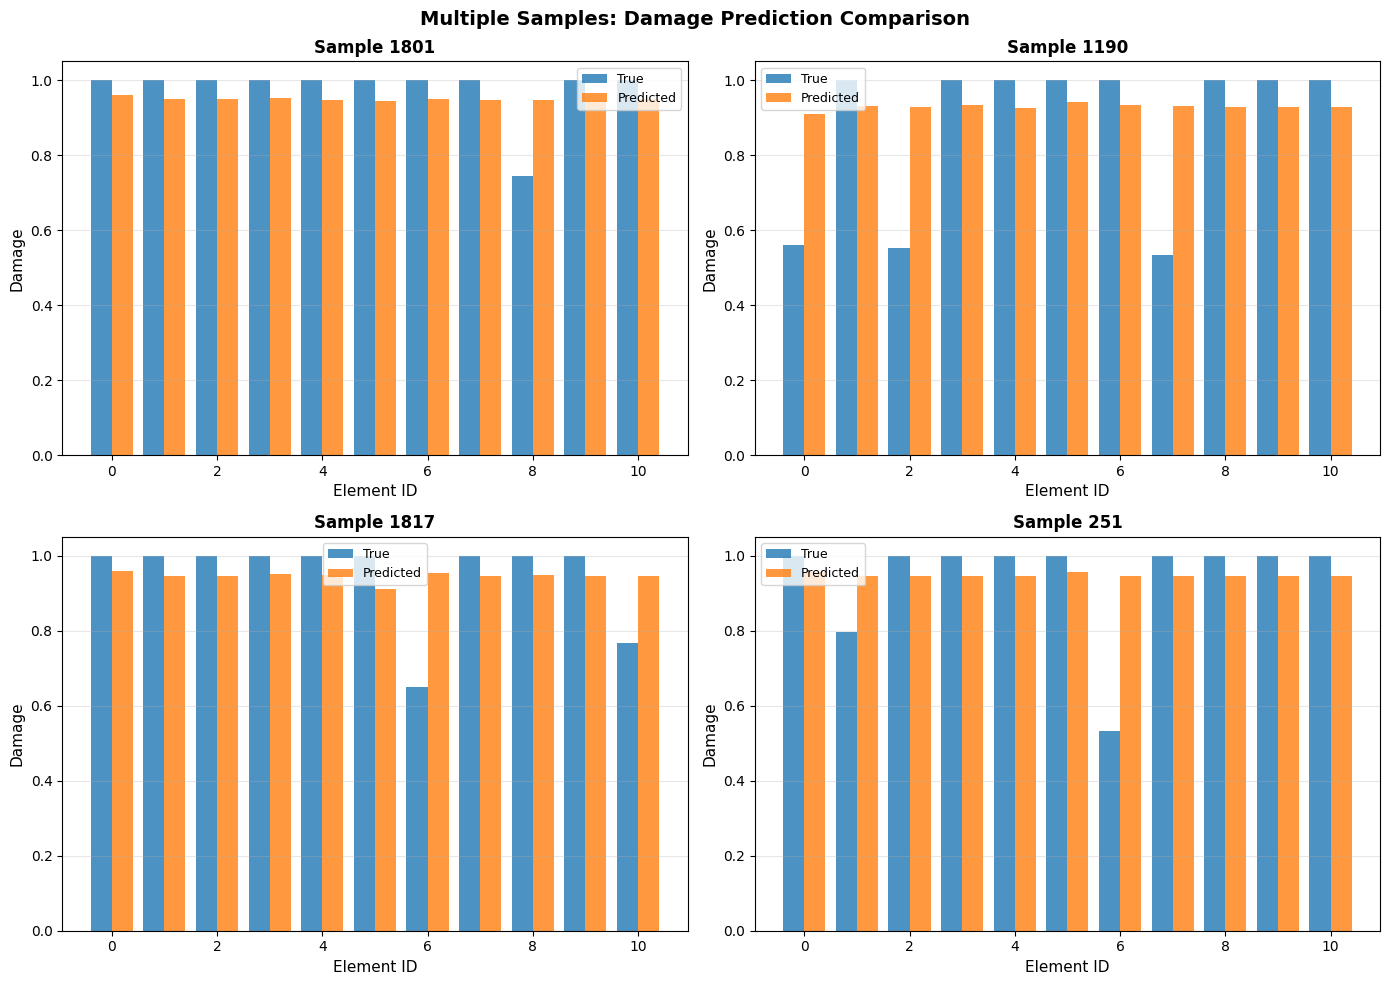

In [5]:
# 展示多个样本
n_samples = 4
sample_indices = np.random.choice(y_true.shape[0], n_samples, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, s_idx in enumerate(sample_indices):
    x = np.arange(len(y_true[s_idx]))
    
    axes[idx].bar(x - 0.2, y_true[s_idx], 0.4, label='True', alpha=0.8)
    axes[idx].bar(x + 0.2, y_pred[s_idx], 0.4, label='Predicted', alpha=0.8)
    axes[idx].set_xlabel('Element ID', fontsize=11)
    axes[idx].set_ylabel('Damage', fontsize=11)
    axes[idx].set_title(f'Sample {s_idx}', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Multiple Samples: Damage Prediction Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 误差分析

误差统计
MAE: 0.0869
RMSE: 0.1239
Max Error: 0.4633
Min Error: 0.0023


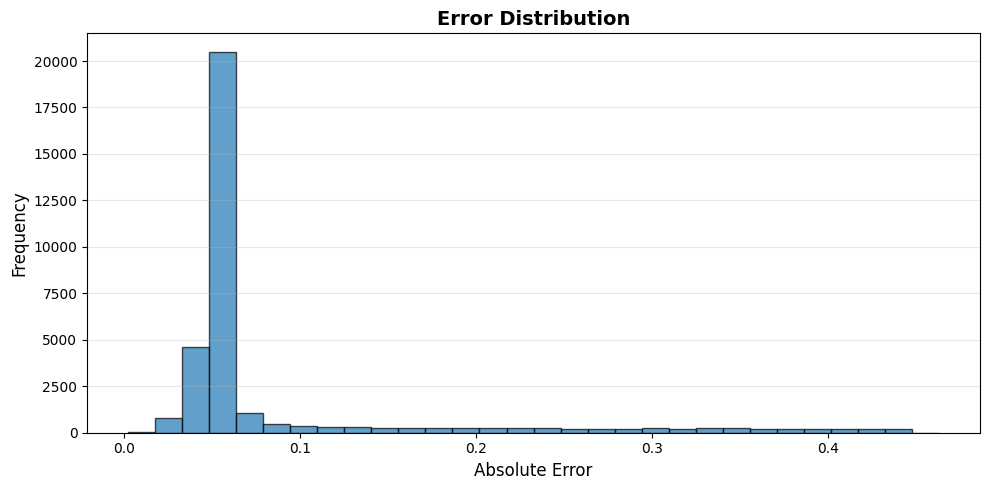

In [6]:
# 计算整体误差
errors = y_true - y_pred
abs_errors = np.abs(errors)

print("=" * 50)
print("误差统计")
print("=" * 50)
print(f"MAE: {np.mean(abs_errors):.4f}")
print(f"RMSE: {np.sqrt(np.mean(errors**2)):.4f}")
print(f"Max Error: {np.max(abs_errors):.4f}")
print(f"Min Error: {np.min(abs_errors):.4f}")

# 绘制误差分布
plt.figure(figsize=(10, 5))
plt.hist(abs_errors.flatten(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Absolute Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Error Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()